In [1]:
from config import init_env, settings
init_env(name='cls_gte_xgb')
settings.MODEL_NAME = 'Alibaba-NLP/gte-base-en-v1.5'
settings.MODELS_PATH

CUDA is available, using GPU NVIDIA GeForce RTX 3090 x4
Invalid token: ***************************************************************************1QTNWUDJZZNUKNkqnL
Invalid token: ***************************************************************************1QTNWUDJZZNUKNkqnL


PosixPath('../models/cls_gte_xgb')

In [2]:
import pandas as pd

df_commits = pd.read_parquet(settings.DATASETS_PATH / 'dataset_cls.parquet')
df_repos = pd.read_csv(settings.DATASETS_PATH / 'repos_cls.csv', on_bad_lines='skip')
print(df_commits.shape, df_repos.shape)
df_commits

(715089, 458) (406, 14)


,nameWithOwner,sha,authorName,authorEmail,date,releaseTag,nFiles,addLines,delLines,lang1CEnterprise,...,avgHistoryComplexity,commits,contributors,stars,issues,prs,comments,type,isInRN,domain
0,ibotpeaches/apktool,841db5061afdb50c010bb79240bfe67c567873b6,Connor Tumbleson,connor.tumbleson@gmail.com,2024-01-05 11:29:04+00:00,v2.9.3,1,1,1,False,...,32.693333,2196,96,19195,1902,550,7814,build,False,Tool
1,ibotpeaches/apktool,f56de45f381d3d09968f7f9f74d5821ec7560b0a,Connor Tumbleson,connor.tumbleson@gmail.com,2024-01-05 11:28:51+00:00,v2.9.2,1,2,2,False,...,6.342727,2189,96,19090,1900,546,7804,build,False,Tool
2,ibotpeaches/apktool,077b2009da671515ec1c86ba6d4c19e4100e18b0,Connor Tumbleson,connor.tumbleson@gmail.com,2023-12-05 23:26:28+00:00,v2.9.2,1,1,1,False,...,6.342727,2189,96,19090,1900,546,7804,build,False,Tool
3,ibotpeaches/apktool,98b34fdd03db825390b426bb1200b8515c001e22,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-12-04 11:08:40+00:00,v2.9.1,2,3,3,False,...,1.927742,2156,95,18869,1889,537,7736,build,False,Tool
4,ibotpeaches/apktool,aa3bd84ceb7d17f6379fe1796bb28598d243d763,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-12-04 11:07:01+00:00,v2.9.1,1,1,1,False,...,1.927742,2156,95,18869,1889,537,7736,build,False,Tool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715084,apache/apisix,588d46ff18248f0bc616425bc162e9ba4862f4da,wonglend,gk.wl@qq.com,2020-07-07 02:36:32+00:00,1.5,1,1,1,False,...,0.497284,42,10,80,16,23,119,fix,False,System
715085,apache/apisix,2ccf0200279b7c8a10edbb3ef867e52a7537dbbc,YuanSheng Wang,membphis@gmail.com,2020-07-02 14:04:24+00:00,1.5,3,6,4,False,...,0.497284,42,10,80,16,23,119,test,False,System
715086,apache/apisix,d419fb22894214e4ef1c1ccfb1ffdaca3dff3fca,YuanSheng Wang,membphis@gmail.com,2020-06-24 01:59:11+00:00,1.5,1,66,0,False,...,0.497284,42,10,80,16,23,119,test,False,System
715087,apache/apisix,e30a7469bcee27ab3422ab6d6b0b8044e2b20588,YuanSheng Wang,membphis@gmail.com,2020-06-23 10:21:08+00:00,1.5,1,1,1,False,...,0.497284,42,10,80,16,23,119,test,False,System


In [3]:
LABEL_COL = 'type'
# count distinct
NUM_LABELS = len(df_commits[LABEL_COL].unique())
# select columns starting with 'lang'
CATE_COLS = ['domain', 'releaseType']
# columns with type 'number' or 'bool'
NUM_COLS = df_commits.select_dtypes(include=['number', 'bool']).columns.tolist()
# drop isInRN from NUM_COLS
NUM_COLS.remove('isInRN')

(LABEL_COL, NUM_LABELS, CATE_COLS, NUM_COLS)

('type',
 11,
 ['domain', 'releaseType'],
 ['nFiles',
  'addLines',
  'delLines',
  'lang1CEnterprise',
  'langAbap',
  'langAgsScript',
  'langAmpl',
  'langAntlr',
  'langApiBlueprint',
  'langApl',
  'langAsn.1',
  'langClassicAsp',
  'langAts',
  'langActionscript',
  'langAda',
  'langAgda',
  'langAlloy',
  'langAlpineAbuild',
  'langAntBuildSystem',
  'langApacheconf',
  'langApex',
  'langApolloGuidanceComputer',
  'langApplescript',
  'langArc',
  'lang21',
  'langAsciidoc',
  'langAspectj',
  'langAssembly',
  'langAugeas',
  'langAutohotkey',
  'langAutoit',
  'langAwk',
  'langBatchfile',
  'langBefunge',
  'langBison',
  'langBitbake',
  'langBlade',
  'langBlitzbasic',
  'langBlitzmax',
  'langBluespec',
  'langBoo',
  'langBrainfuck',
  'langBrightscript',
  'langZeek',
  'langC',
  'langC#',
  'langC++',
  'langC-Objdump',
  'langC2HsHaskell',
  'langClips',
  'langCmake',
  'langCobol',
  'langCollada',
  'langCss',
  'langCsv',
  "langCap'NProto",
  'langCartocss',
  

In [4]:
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer

# why gte?
# 1. top 20 on mteb classification https://huggingface.co/BAAI/bge-base-en-v1.5
# 2. very small model (137M parameters) for fast training and inference
model_path = 'Alibaba-NLP/gte-base-en-v1.5'
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModel.from_pretrained(model_path, trust_remote_code=True).to(settings.TORCH_DEVICE)
model

NewModel(
  (embeddings): NewEmbeddings(
    (word_embeddings): Embedding(30528, 768, padding_idx=0)
    (rotary_emb): NTKScalingRotaryEmbedding()
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): NewEncoder(
    (layer): ModuleList(
      (0-11): 12 x NewLayer(
        (attention): NewSdpaAttention(
          (qkv_proj): Linear(in_features=768, out_features=2304, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (o_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (mlp): NewGatedMLP(
          (up_gate_proj): Linear(in_features=768, out_features=6144, bias=False)
          (down_proj): Linear(in_features=3072, out_features=768, bias=True)
          (act_fn): GELUActivation()
          (hidden_dropout): Dropout(p=0.1, inplace=False)
        )
        (attn_ln): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (mlp_ln): LayerNorm((768,), eps=1

In [5]:
# Sanity check
input_texts = [
    "what is the capital of China?",
    "how to implement quick sort in python?",
    "Beijing",
    "sorting algorithms"
]

model.eval()
batch_dict = tokenizer(
    input_texts, max_length=8192, padding=True, truncation=True, return_tensors='pt'
).to(settings.TORCH_DEVICE)
outputs = model(**batch_dict)
embeddings = outputs.last_hidden_state[:, 0]
 
embeddings = F.normalize(embeddings, p=2, dim=1)
scores = (embeddings[:1] @ embeddings[1:].T) * 100
scores

tensor([[34.5049, 64.0397, 19.5200]], device='cuda:0', grad_fn=<MulBackward0>)

In [6]:
import numpy as np
import torch
import os
from tqdm.auto import tqdm

settings.BATCH_SIZE = 320
model.eval()

if os.path.exists(settings.CACHE_PATH / 'df_embs.parquet'):
    df_embs = pd.read_parquet(settings.CACHE_PATH / 'df_embs.parquet')
    print(df_embs.shape)
else:
    with torch.no_grad():
        _df_embs = []
        # chunk df['body']
        for _texts in tqdm(np.array_split(
            df_commits['body'], len(df_commits) // settings.BATCH_SIZE)):
            _texts = _texts.tolist()
            batch_dict = tokenizer(
                _texts, max_length=8192, padding=True, truncation=True, return_tensors='pt'
            ).to(settings.TORCH_DEVICE)
            outputs = model(**batch_dict)
            embeddings = outputs.last_hidden_state[:, 0].cpu().detach().numpy()
            _df_embs.append(embeddings)

    # concatenate all embeddings
    df_embs = pd.concat([pd.DataFrame(_embs) for _embs in _df_embs], ignore_index=True)
    # name the columns: emb0, emb1, ..., emb767
    df_embs.columns = [f'emb{i}' for i in range(df_embs.shape[1])]
    df_embs.to_parquet(settings.CACHE_PATH / 'df_embs.parquet', index=False)
df_embs

(715089, 768)


,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb758,emb759,emb760,emb761,emb762,emb763,emb764,emb765,emb766,emb767
0,0.513509,-0.279986,-0.100796,0.275770,0.341694,0.153160,1.547516,-1.364747,0.422434,-0.612924,...,-0.256102,0.125091,-1.154524,-0.151802,0.147414,0.048927,-1.091866,-0.331586,-0.691879,0.360439
1,0.431836,-0.619861,-0.004430,0.414072,1.517429,0.835564,0.736091,-0.169916,-0.016492,-0.075876,...,-0.081786,-0.027767,-0.360803,-1.365947,-0.167655,0.219973,0.482750,-1.244631,0.702176,0.262912
2,0.212686,-0.318852,-0.176043,-0.173449,0.540310,0.260522,1.659656,-1.077280,0.564538,-0.755383,...,-0.221459,0.216080,-1.261484,-0.268233,0.387952,0.028570,-1.089373,-0.484683,-0.507972,0.353996
3,0.268470,-0.055236,-0.727321,0.419075,0.048423,0.199789,0.514879,-1.212424,0.739183,-0.623174,...,-0.741902,-0.316897,-0.426491,-1.623979,0.772950,-0.133958,-0.017401,-0.276495,-0.616585,0.502690
4,0.815939,-0.336819,-0.150502,1.057852,0.213573,0.359202,-0.286163,-1.032599,-0.702782,-1.172883,...,-1.052979,-0.001983,-0.389210,-0.416109,0.391233,0.435913,-0.485116,-0.580301,-0.105125,0.370329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715084,0.915853,-0.334426,-1.502736,-1.701036,-0.986858,-0.273936,0.015655,-0.933079,-0.203701,-0.396269,...,0.400074,0.245139,1.396497,0.066010,-0.040599,0.061678,0.078070,-0.332994,-0.682354,-0.338568
715085,-0.198437,-0.369321,-0.895490,-0.614853,-1.057132,0.514643,0.883065,-0.245400,-0.531566,-0.681224,...,-0.243646,0.315404,-1.711320,0.700613,-0.472846,0.316431,-0.646715,0.546321,-0.507286,0.103488
715086,0.381253,-0.231015,0.341456,-0.622993,1.478510,-0.720486,0.454734,0.747840,-0.721641,-0.009958,...,0.746302,-0.310558,-0.869934,-0.038687,0.229896,-0.697935,0.850964,0.117021,0.464875,-0.202725
715087,0.662904,-0.824740,-0.573416,0.113120,-0.363528,-0.437290,-0.736680,-0.235963,1.253657,-1.627521,...,0.043648,0.142735,-0.367581,-0.666413,-0.477431,-0.150941,-0.921825,0.548175,0.398210,0.555037


In [7]:
# naive split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# _df_cls = pd.read_parquet('../temp/cls_bge_emb.parquet')
df_ds = pd.concat([df_commits, df_embs], axis=1)\
    .drop(columns=['nameWithOwner', 'sha', 'authorName', 'authorEmail', 'date', 'releaseTag', 'body', 'isInRN'])

_encoder_type = LabelEncoder()
_encoder_type.fit(settings.categories.conventional_commits)
df_ds['type'] = pd.Series(_encoder_type.transform(df_ds['type'])).astype('category')

_encode_releaseType = LabelEncoder()
_encode_releaseType.fit(settings.categories.release_types)
df_ds['releaseType'] = pd.Series(_encode_releaseType.transform(df_ds['releaseType'])).astype('category')

_encoder_domain = LabelEncoder()
_encoder_domain.fit(settings.categories.project_domains)
df_ds['domain'] = pd.Series(_encoder_domain.transform(df_ds['domain'])).astype('category')

ds_train, ds_test = train_test_split(
    df_ds, test_size=0.3, random_state=settings.seed, stratify=df_ds['type']
)
ds_test, ds_valid = train_test_split(
    ds_test, test_size=0.33, random_state=settings.seed, stratify=ds_test['type']
)

# ds_train.to_parquet('../temp/cls_train.parquet')
# ds_test.to_parquet('../temp/cls_test.parquet')
# ds_valid.to_parquet('../temp/cls_valid.parquet')

X_train, y_train = ds_train.drop(columns=['type']), ds_train['type']
X_test, y_test = ds_test.drop(columns=['type']), ds_test['type']
X_valid, y_valid = ds_valid.drop(columns=['type']), ds_valid['type']

print(ds_train.shape, ds_test.shape, ds_valid.shape)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


(500562, 1218) (143733, 1218) (70794, 1218)


In [11]:
from config import load_settings
load_settings()
init_env(name='cls_gte_xgb')

CUDA is available, using GPU NVIDIA GeForce RTX 3090 x4
Invalid token: ***************************************************************************1QTNWUDJZZNUKNkqnL
Invalid token: ***************************************************************************1QTNWUDJZZNUKNkqnL


In [13]:
import xgboost as xgb
from sklearn.metrics import classification_report
import json

clf = xgb.XGBClassifier(
        objective="multi:softmax",
        tree_method="hist", 
        enable_categorical=True, 
        device="cuda",
        eval_metric="mlogloss",
        random_state=settings.SEED,
        early_stopping_rounds=10,
    )
clf.fit(
    X_train.values, y_train.values,
    eval_set=[(X_test.values, y_test.values)],
    verbose=True,
)
clf.save_model(settings.MODELS_PATH / 'cls_gte_xgb_split.json')
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
with open(settings.MODELS_PATH / 'cls_gte_xgb_split.perf.json', 'w') as f:
    json.dump(classification_report(y_test, y_pred, output_dict=True), f)

[0]	validation_0-mlogloss:1.90967
[1]	validation_0-mlogloss:1.69290
[2]	validation_0-mlogloss:1.55199
[3]	validation_0-mlogloss:1.44961
[4]	validation_0-mlogloss:1.37141
[5]	validation_0-mlogloss:1.31033
[6]	validation_0-mlogloss:1.26264
[7]	validation_0-mlogloss:1.22329
[8]	validation_0-mlogloss:1.19033
[9]	validation_0-mlogloss:1.16143
[10]	validation_0-mlogloss:1.13646
[11]	validation_0-mlogloss:1.11682
[12]	validation_0-mlogloss:1.09926
[13]	validation_0-mlogloss:1.08364
[14]	validation_0-mlogloss:1.07039
[15]	validation_0-mlogloss:1.05786
[16]	validation_0-mlogloss:1.04351
[17]	validation_0-mlogloss:1.03393
[18]	validation_0-mlogloss:1.02519
[19]	validation_0-mlogloss:1.01510
[20]	validation_0-mlogloss:1.00783
[21]	validation_0-mlogloss:1.00073
[22]	validation_0-mlogloss:0.99414
[23]	validation_0-mlogloss:0.98731
[24]	validation_0-mlogloss:0.97981
[25]	validation_0-mlogloss:0.97388
[26]	validation_0-mlogloss:0.96930
[27]	validation_0-mlogloss:0.96389
[28]	validation_0-mlogloss:0.9

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:08:59] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.91      0.65      0.76      4746
           1       0.76      0.77      0.77     40960
           2       0.68      0.44      0.54      1946
           3       0.78      0.76      0.77     13955
           4       0.66      0.64      0.65     23203
           5       0.68      0.80      0.73     45149
           6       0.62      0.20      0.30       838
           7       0.55      0.34      0.42      7375
           8       0.71      0.04      0.07       139
           9       0.66      0.23      0.34       784
          10       0.62      0.48      0.54      4638

    accuracy                           0.71    143733
   macro avg       0.69      0.49      0.54    143733
weighted avg       0.71      0.71      0.70    143733



In [14]:
# sample 100, check the uncorrectly classified
_sampled = ds_test.sample(100, random_state=settings.SEED)
_sampled['type'] = _encoder_type.inverse_transform(_sampled['type'])
_predicted = clf.predict(_sampled.drop(columns=['type']))
_predicted = _encoder_type.inverse_transform(_predicted)
_sampled['predicted'] = _predicted
_sampled['body'] = df_commits['body'][_sampled.index]
_sampled['url'] = 'https://github.com/' + df_commits['nameWithOwner'][_sampled.index] + '/commit/' + df_commits['sha'][_sampled.index]
_df = _sampled[_sampled['predicted'] != _sampled['type']][['url','body','type','predicted']]
# print in markdown format
print(_df.to_markdown(index=False))

| url                                                                                                  | body                                                                               | type     | predicted   |
|:-----------------------------------------------------------------------------------------------------|:-----------------------------------------------------------------------------------|:---------|:------------|
| https://github.com/nocodb/nocodb/commit/281a67990675bf1767ca9b858a029d7b4c7609b5                     | extract as object                                                                  | fix      | refactor    |
| https://github.com/bytebase/bytebase/commit/5c7bb63e8a106185cbd8dcdf81420fdb061f9984                 | delete pipeline task stage with NULL project_id if there are few (#7478)           | chore    | fix         |
| https://github.com/pnpm/pnpm/commit/78aa2748d1edb5aca2c0cf8eeb33a4d0927ac415                         | update @types/ramda to version 0.0.

In [15]:
# k-fold cross validation
from tqdm import tqdm
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import json

settings.KFOLD_SPLITS = 5

X, y = df_ds.drop(columns=['type']), df_ds['type']
skf = StratifiedKFold(n_splits=settings.KFOLD_SPLITS, shuffle=True, random_state=settings.SEED)

_metrics = []
_loss = []
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print('fold', i+1, 'of', settings.KFOLD_SPLITS, ', inputs:', X_train.shape, X_test.shape)
    clf = xgb.XGBClassifier(
        objective="multi:softmax",
        tree_method="hist", 
        enable_categorical=True, 
        device="cuda",
        eval_metric="mlogloss",
        early_stopping_rounds=10,
        random_state=settings.SEED,
    )
    clf.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=True,
    )
    clf.save_model(settings.MODELS_PATH / 'cls_xgb_kfold_{}.json'.format(i+1))
    print('best it', clf.best_iteration, 'best score', clf.best_score)

    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    _metric = classification_report(y_test, y_pred, output_dict=True)
    with open(settings.MODELS_PATH / 'cls_xgb_kfold_{}.perf.json'.format(i+1), 'w') as f:
        json.dump(_metric, f, indent=2)
    _metrics.append(_metric)
    _loss.append(clf.best_score)

_acc = [m['accuracy'] for m in _metrics]
_f1_weighted = [m['weighted avg']['f1-score'] for m in _metrics]

fold 1 of 5 , inputs: (572071, 1217) (143018, 1217)
[0]	validation_0-mlogloss:1.90835
[1]	validation_0-mlogloss:1.69051
[2]	validation_0-mlogloss:1.54838
[3]	validation_0-mlogloss:1.44541
[4]	validation_0-mlogloss:1.36828
[5]	validation_0-mlogloss:1.30587
[6]	validation_0-mlogloss:1.25746
[7]	validation_0-mlogloss:1.21832
[8]	validation_0-mlogloss:1.18337
[9]	validation_0-mlogloss:1.15619
[10]	validation_0-mlogloss:1.13265
[11]	validation_0-mlogloss:1.11173
[12]	validation_0-mlogloss:1.09333
[13]	validation_0-mlogloss:1.07745
[14]	validation_0-mlogloss:1.06320
[15]	validation_0-mlogloss:1.05017
[16]	validation_0-mlogloss:1.03876
[17]	validation_0-mlogloss:1.02905
[18]	validation_0-mlogloss:1.01966
[19]	validation_0-mlogloss:1.01004
[20]	validation_0-mlogloss:1.00094
[21]	validation_0-mlogloss:0.99381
[22]	validation_0-mlogloss:0.98602
[23]	validation_0-mlogloss:0.97869
[24]	validation_0-mlogloss:0.97170
[25]	validation_0-mlogloss:0.96602
[26]	validation_0-mlogloss:0.96148
[27]	validati

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


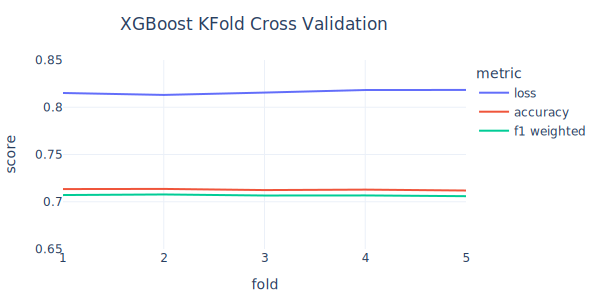

In [16]:
# plot loss, accuracy, f1 weighted in one line plot, but with plotly

import plotly.express as px

fig = px.line(
    x=list(range(1, settings.KFOLD_SPLITS+1)),
    y=[_loss, _acc, _f1_weighted],
    labels={'x':'fold', 'value':'score', 'variable':'metric'},
    title='XGBoost KFold Cross Validation',
    template='plotly_white',
    # scale y: 0-1
    range_y=[0.65, 0.85],
)
newnames = {
    'wide_variable_0': 'loss',
    'wide_variable_1': 'accuracy',
    'wide_variable_2': 'f1 weighted'
}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                legendgroup = newnames[t.name],
                hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                )
        )
# tight the layout
fig.update_layout(
    height=300, width=600,
    margin=dict(l=10, r=10, t=60, b=10),
    title_x=0.2,
)
# export to pdf
fig.write_image(settings.PLOTS_PATH / 'cls_xgb_kfold.pdf')
fig.show(renderer='svg')

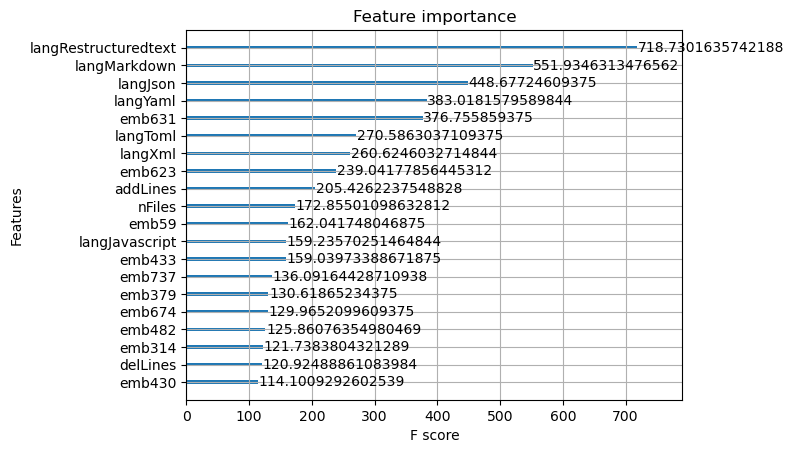

In [18]:
import matplotlib.pyplot as plt
xgb.plot_importance(clf, importance_type='gain', max_num_features=20)
plt.savefig(settings.PLOTS_PATH / 'cls_xgb_importance_gain.pdf')
plt.show()

In [101]:
# calculate shap values on GPU
# check https://xgboost.readthedocs.io/en/stable/python/gpu-examples/tree_shap.html#sphx-glr-python-gpu-examples-tree-shap-py
import shap

# model = xgb.Booster(model_file=settings.MODELS_PATH / 'cls_xgb_kfold_0.json')
# model.set_param({"device": "cuda"})
# # Compute shap values using GPU with xgboost
# model.load_model(settings.MODELS_PATH / 'cls_xgb_kfold_0.json')
# X_valid = xgb.DMatrix(X_valid, enable_categorical=True)

# # sample 10% of the validation set
_to_test = X_valid.sample(int(0.1 * len(X_valid)), random_state=settings.SEED)
_d_x_valid = xgb.DMatrix(_to_test, enable_categorical=True)

# # Compute shap interaction values using GPU
# _xgb_booster = clf.get_booster()
# shap_values = _xgb_booster.predict(_d_x_valid, pred_contribs=True)
# shap_interaction_values = _xgb_booster.predict(_d_x_valid, pred_interactions=True)

# shap will call the GPU accelerated version as long as the device parameter is set to
# "cuda"
explainer = shap.TreeExplainer(clf.get_booster())
shap_values = explainer.shap_values(_d_x_valid)
shap_values 
# visualize the first prediction's explanation
# shap.force_plot(
#     explainer.expected_value,
#     shap_values,
#     matplotlib=True,
# )

# Show a summary of feature importance
# shap.bar_plot(shap_values, _to_test)

array([[[ 6.15031086e-02,  4.27865535e-02,  1.19473234e-01, ...,
         -2.16070632e-03,  1.11379093e-02,  1.07409500e-01],
        [ 4.86250184e-02,  9.08926502e-02,  1.35632262e-01, ...,
          3.13648611e-01,  7.57290348e-02, -3.43880236e-01],
        [-4.72023338e-02, -7.25760087e-02,  2.96096057e-02, ...,
         -5.94786048e-01, -8.33987221e-02,  2.00891569e-01],
        ...,
        [-1.04042720e-02, -9.03609442e-04,  3.86247339e-05, ...,
         -6.27032667e-03,  1.00371493e-02, -3.19141848e-03],
        [ 7.55236833e-04, -7.24763260e-04,  1.43333117e-03, ...,
         -5.99834463e-03, -5.16042858e-03,  1.95404468e-03],
        [ 1.16305682e-03, -2.21964592e-06, -1.13287671e-02, ...,
         -3.57129425e-02, -2.89230258e-04, -1.18249181e-05]],

       [[ 7.07795098e-02,  5.34849651e-02,  2.20182434e-01, ...,
         -3.72824632e-03, -7.92990159e-03,  8.57994482e-02],
        [ 9.09742191e-02,  2.71064728e-01,  1.46956101e-01, ...,
          3.13697219e-01, -2.20041256e

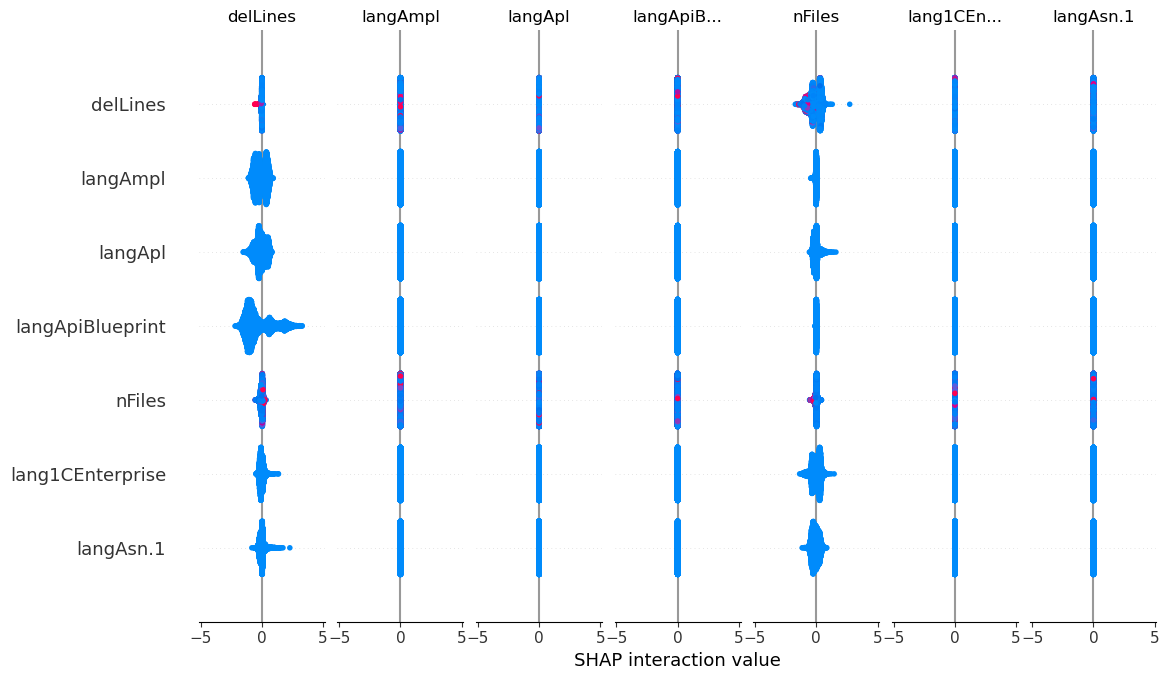

In [ ]:
# plot shap
import shap

_to_test = X_valid.sample(int(0.1 * len(X_valid)), random_state=settings.SEED)
explainer = shap.TreeExplainer(_best_clf)
shap_values = explainer.shap_values(_to_test)

shap.summary_plot(
    shap_values, 
    _to_test, 
    plot_type="bar", 
    class_names=settings.categories.conventional_commits
)

[0]	validation_0-mlogloss:2.19510
[1]	validation_0-mlogloss:2.04703
[2]	validation_0-mlogloss:1.92978
[3]	validation_0-mlogloss:1.83346
[4]	validation_0-mlogloss:1.75106
[5]	validation_0-mlogloss:1.67988
[6]	validation_0-mlogloss:1.61756
[7]	validation_0-mlogloss:1.56209
[8]	validation_0-mlogloss:1.51277
[9]	validation_0-mlogloss:1.46826
[10]	validation_0-mlogloss:1.42808
[11]	validation_0-mlogloss:1.39152
[12]	validation_0-mlogloss:1.35830
[13]	validation_0-mlogloss:1.32784
[14]	validation_0-mlogloss:1.29954
[15]	validation_0-mlogloss:1.27396
[16]	validation_0-mlogloss:1.25034
[17]	validation_0-mlogloss:1.22822
[18]	validation_0-mlogloss:1.20756
[19]	validation_0-mlogloss:1.18910
[20]	validation_0-mlogloss:1.17088
[21]	validation_0-mlogloss:1.15465
[22]	validation_0-mlogloss:1.13926
[23]	validation_0-mlogloss:1.12486
[24]	validation_0-mlogloss:1.11172
[25]	validation_0-mlogloss:1.09932
[26]	validation_0-mlogloss:1.08761
[27]	validation_0-mlogloss:1.07626
[28]	validation_0-mlogloss:1.0

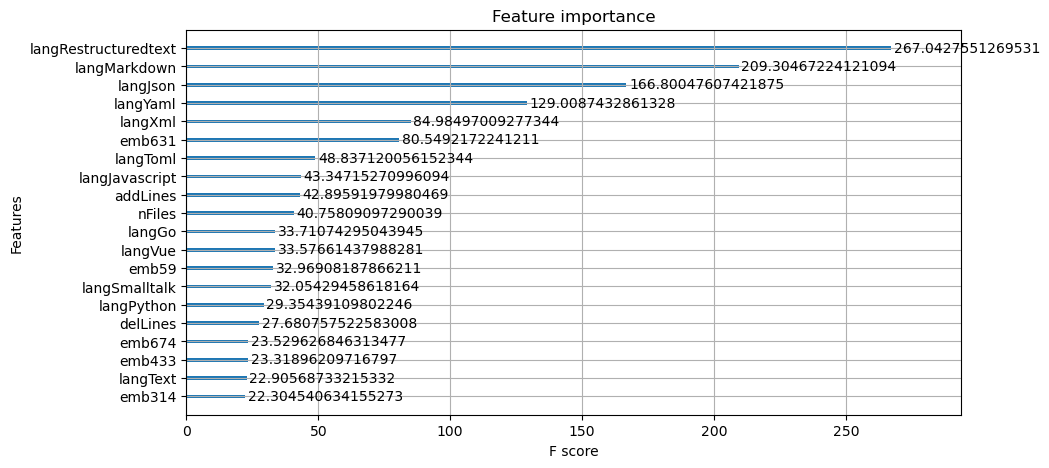

In [ ]:
# Grid search moved to a separate py file
# Can't run jupyter in the background

# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     "max_depth": [3, 5, 7, 9],
#     "learning_rate": [0.01, 0.03, 0.1, 0.3],
#     "n_estimators": [200, 300, 400, 500, 600],
# }
# clf = xgb.XGBClassifier(
#         objective="binary:logistic",
#         tree_method="hist", 
#         enable_categorical=True, 
#         device="cuda",
#         eval_metric="logloss",
#         early_stopping_rounds=10,
#         random_state=settings.SEED,
#     )
# grid_search = GridSearchCV(clf, param_grid, cv=3, n_jobs=1, verbose=4, scoring="f1_weighted",)
# grid_search.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)        
# print('best params', grid_search.best_params_)
# _best_clf = grid_search.best_estimator_
# _best_clf.save_model(settings.MODELS_PATH / "xgb_gridsearch_best.json")
# print('best it', _best_clf.best_iteration, 'best score', _best_clf.best_score)
# # print perf
# y_pred = _best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# with open(settings.MODELS_PATH / 'xgb_gridsearch_best.perf.json', 'w') as f:
#     json.dump(classification_report(y_test, y_pred, output_dict=True), f, indent=2)
# # Get feature importances
# importances = _best_clf.get_booster().get_score(importance_type="gain")
# xgb.plot_importance(importances, max_num_features=20, importance_type="gain")

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import classification_report
import json

# best params found by grid search
BEST_PARAMS = {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
# BEST_PARAMS = {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 500}

_best_clf = xgb.XGBClassifier(
        objective="multi:softmax",
        tree_method="hist", 
        enable_categorical=True, 
        device="cuda",
        eval_metric="mlogloss",
        early_stopping_rounds=10,
        random_state=settings.SEED,
        **BEST_PARAMS
    )
# train
_best_clf.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=True)
# save
_best_clf.save_model(settings.MODELS_PATH / "xgb_gridsearch_best.json")

print('best it', _best_clf.best_iteration, 'best score', _best_clf.best_score)

# print perf
y_pred = _best_clf.predict(X_test)
print(classification_report(y_test, y_pred))
with open(settings.MODELS_PATH / 'xgb_gridsearch_best.perf.json', 'w') as f:
    json.dump(classification_report(y_test, y_pred, output_dict=True), f, indent=2)

# Get feature importances
importances = _best_clf.get_booster().get_score(importance_type="gain")
plt = xgb.plot_importance(importances, max_num_features=20, importance_type="gain")
plt.figure.set_size_inches(10, 5)
plt.figure.savefig(settings.PLOTS_PATH / 'xgb_gridsearch_best_importance.pdf', bbox_inches='tight')

In [21]:
# let's create some baselines

# 1. a naive multicategory classifier

# use a linear SVM
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# reference: https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html
class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

# standardize the data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# train the model
clf = NaivelyCalibratedLinearSVC(C=1.0, max_iter=100, random_state=settings.SEED)

clf.fit(X_train, y_train)

# evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
with open(settings.MODELS_PATH / 'cls_naive_linear_svc.perf.json', 'w') as f:
    json.dump(classification_report(y_test, y_pred, output_dict=True), f)

# save the model
import joblib
joblib.dump(clf, settings.MODELS_PATH / 'cls_naive_linear_svc.joblib')

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

              precision    recall  f1-score   support

           0       0.29      0.02      0.04      4722
           1       0.55      0.76      0.64     40757
           2       0.43      0.06      0.10      1936
           3       0.69      0.55      0.61     13885
           4       0.55      0.43      0.48     23087
           5       0.60      0.65      0.62     44925
           6       0.42      0.03      0.05       834
           7       0.27      0.11      0.15      7338
           8       0.00      0.00      0.00       138
           9       0.12      0.01      0.01       780
          10       0.38      0.47      0.42      4615

    accuracy                           0.56    143017
   macro avg       0.39      0.28      0.28    143017
weighted avg       0.55      0.56      0.54    143017



/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/raid/hrz/smartdraft/.pixi/envs/default/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



['../models/cls_gte_xgb/cls_naive_linear_svc.joblib']

In [24]:
# 2. a xgb classifier without text features

X_train, y_train = ds_train.drop(columns=['type']), ds_train['type']
X_test, y_test = ds_test.drop(columns=['type']), ds_test['type']
X_valid, y_valid = ds_valid.drop(columns=['type']), ds_valid['type']

clf = xgb.XGBClassifier(
        objective="multi:softmax",
        tree_method="hist", 
        enable_categorical=True, 
        device="cuda",
        eval_metric="mlogloss",
        random_state=settings.SEED,
        early_stopping_rounds=10,
    )
clf.fit(
    X_train.drop(columns=df_embs.columns), y_train,
    eval_set=[(X_test.drop(columns=df_embs.columns), y_test)],
    verbose=True,
)

# save the model
clf.save_model(settings.MODELS_PATH / 'cls_xgb_no_text.json')
# save perf
y_pred = clf.predict(X_test.drop(columns=df_embs.columns))
print(classification_report(y_test, y_pred))
with open(settings.MODELS_PATH / 'cls_xgb_no_text.perf.json', 'w') as f:
    json.dump(classification_report(y_test, y_pred, output_dict=True), f, indent=2)

[0]	validation_0-mlogloss:1.92839
[1]	validation_0-mlogloss:1.73180
[2]	validation_0-mlogloss:1.60382
[3]	validation_0-mlogloss:1.51128
[4]	validation_0-mlogloss:1.44264
[5]	validation_0-mlogloss:1.38919
[6]	validation_0-mlogloss:1.34602
[7]	validation_0-mlogloss:1.31141
[8]	validation_0-mlogloss:1.28238
[9]	validation_0-mlogloss:1.25939
[10]	validation_0-mlogloss:1.23955
[11]	validation_0-mlogloss:1.22118
[12]	validation_0-mlogloss:1.20776
[13]	validation_0-mlogloss:1.19409
[14]	validation_0-mlogloss:1.18312
[15]	validation_0-mlogloss:1.17327
[16]	validation_0-mlogloss:1.16398
[17]	validation_0-mlogloss:1.15512
[18]	validation_0-mlogloss:1.14905
[19]	validation_0-mlogloss:1.14200
[20]	validation_0-mlogloss:1.13590
[21]	validation_0-mlogloss:1.12961
[22]	validation_0-mlogloss:1.12484
[23]	validation_0-mlogloss:1.11952
[24]	validation_0-mlogloss:1.11525
[25]	validation_0-mlogloss:1.11037
[26]	validation_0-mlogloss:1.10718
[27]	validation_0-mlogloss:1.10398
[28]	validation_0-mlogloss:1.1

In [25]:
# a xgb classifier with only text features

clf = xgb.XGBClassifier(
        objective="multi:softmax",
        tree_method="hist", 
        enable_categorical=True, 
        device="cuda",
        eval_metric="mlogloss",
        random_state=settings.SEED,
        early_stopping_rounds=10,
    )
clf.fit(
    X_train[df_embs.columns], y_train,
    eval_set=[(X_test[df_embs.columns], y_test)],
    verbose=True,
)

# save the model
clf.save_model(settings.MODELS_PATH / 'cls_xgb_only_text.json')
# save perf
y_pred = clf.predict(X_test[df_embs.columns])
print(classification_report(y_test, y_pred))
with open(settings.MODELS_PATH / 'cls_xgb_only_text.perf.json', 'w') as f:
    json.dump(classification_report(y_test, y_pred, output_dict=True), f, indent=2)

[0]	validation_0-mlogloss:2.01022
[1]	validation_0-mlogloss:1.81914
[2]	validation_0-mlogloss:1.69171
[3]	validation_0-mlogloss:1.59904
[4]	validation_0-mlogloss:1.52960
[5]	validation_0-mlogloss:1.47451
[6]	validation_0-mlogloss:1.43079
[7]	validation_0-mlogloss:1.39582
[8]	validation_0-mlogloss:1.36670
[9]	validation_0-mlogloss:1.34287
[10]	validation_0-mlogloss:1.32263
[11]	validation_0-mlogloss:1.30490
[12]	validation_0-mlogloss:1.28980
[13]	validation_0-mlogloss:1.27675
[14]	validation_0-mlogloss:1.26517
[15]	validation_0-mlogloss:1.25491
[16]	validation_0-mlogloss:1.24571
[17]	validation_0-mlogloss:1.23767
[18]	validation_0-mlogloss:1.23051
[19]	validation_0-mlogloss:1.22392
[20]	validation_0-mlogloss:1.21826
[21]	validation_0-mlogloss:1.21268
[22]	validation_0-mlogloss:1.20758
[23]	validation_0-mlogloss:1.20299
[24]	validation_0-mlogloss:1.19863
[25]	validation_0-mlogloss:1.19476
[26]	validation_0-mlogloss:1.19077
[27]	validation_0-mlogloss:1.18713
[28]	validation_0-mlogloss:1.1